<a href="https://colab.research.google.com/github/tazkiyyahia/tazkiyyahia/blob/main/CANCER_CLASSIFICATION_MULTICLASS_(ROC_AUC)_NO_FEATURE_SELECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving data6275fitur.csv to data6275fitur.csv


INSTALL ALL MODULES&PACKAGES

In [2]:
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from collections import Counter
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split  
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from lightgbm import LGBMModel
from lightgbm import LGBMRanker 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
import sklearn.metrics as metrics
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from imblearn.over_sampling import SMOTENC
from imblearn.metrics import classification_report_imbalanced


In [3]:
from sklearn.metrics import precision_recall_curve

DATASET

In [4]:
df = pd.read_csv('data6275fitur.csv')
df.head()
df.shape

(73, 6275)

MENDEFINISIKAN CATEGORICAL FEATURE UNTUK LIGHTGBM

In [5]:
cols = ["ethnic.ch1","m.stage.ch1","Sex.ch1"]
for item in cols:
    df[item] = df[item].astype("category").cat.codes +1



LABEL ENCODER

In [6]:
labelencoder=LabelEncoder()
df['class'] = labelencoder.fit_transform(df['subgroup.ch1'])
df[["subgroup.ch1","class"]]

#df_y=df[["subgroup.ch1","class"]]
#df_y.to_csv('data Y.csv', index=False)
#downloaded=files.download('data Y.csv')

,subgroup.ch1,class
0,G3,0
1,G3,0
2,G3,0
3,G3,0
4,G3,0
...,...,...
68,SHH,2
69,SHH,2
70,WNT,3
71,WNT,3


FEATURE&CLASS

(73,)

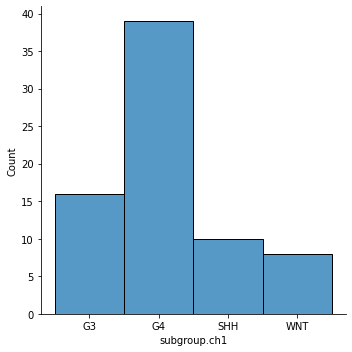

In [7]:
sns.displot(df, x="subgroup.ch1")
X = df.drop(['subgroup.ch1','class'], axis=1)
Y = df['class']
Y.shape

TRAINING-TESTING (70-30%)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)
print('Train size :',X_train.shape, y_train.shape)
print('Test size  :', X_test.shape, y_test.shape)

(51, 6274)
(22, 6274)
(22,)
(51,)
Train size : (51, 6274) (51,)
Test size  : (22, 6274) (22,)


MELIHAT JUMLAH MASING-MASING KELAS

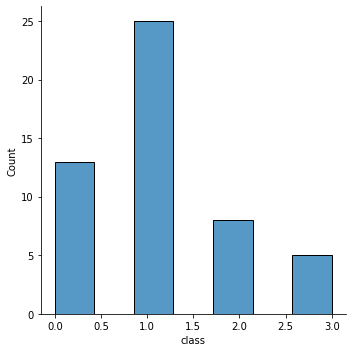

In [9]:
y_train_ = pd.DataFrame(data=y_train,columns=['class'])
sns.displot(y_train_, x="class")

MODEL LIGHTGBM TANPA RESAMPLING

In [10]:
param_dict = {
    'num_leaves': [4, 8, 12, 20],
    'max_depth': [1,2,3,4,5,6,7,8],
    'learning_rate':[0.1,0.3,0.5,0.7,0.9]
    }


clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass',
                         colsample_bytree=1.0, n_estimators=100,
                         num_class=4, metric='multi_logloss')

gs=GridSearchCV(clf, param_dict, scoring='accuracy', verbose=1,cv=5, n_jobs=1)
gs.fit(X_train,y_train)
gs.best_params_
gs.best_score_
gs.best_estimator_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


LGBMClassifier(max_depth=1, metric='multi_logloss', num_class=4, num_leaves=4,
               objective='multiclass')

HASIL ORIGINAL TANPA RESAMPLING

In [11]:
predict_grid = gs.predict(X_test)
print("nilai f-1 score       : %0.3f"% metrics.f1_score(y_test, predict_grid, average='macro'))
print("nilai akurasi         : %0.3f"% metrics.accuracy_score(y_test, predict_grid))

print('Original Results:',classification_report(y_test, predict_grid))
print(confusion_matrix(y_test, predict_grid))
print('Akurasi original test = ', accuracy_score(y_test, predict_grid))


nilai f-1 score       : 0.899
nilai akurasi         : 0.909
Original Results:               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22

[[ 2  1  0  0]
 [ 1 13  0  0]
 [ 0  0  2  0]
 [ 0  0  0  3]]
Akurasi original test =  0.9090909090909091


In [12]:
print(predict_grid)

[0 1 0 1 3 3 3 1 1 1 1 1 1 1 0 1 1 1 2 1 2 1]


CONFUSSION MATRIX ORIGINAL 

['Class 0', 'Class 1', 'Class 2', 'Class 3']


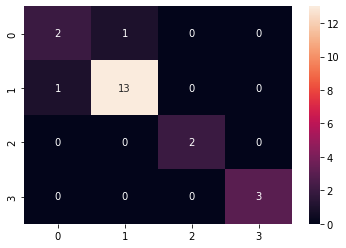

In [13]:
classes =[]
labeles=np.unique(y_train)
for v in labeles:
    classes.append('Class '+ str(v))
print(classes)
classes

cnf_matrix = confusion_matrix(y_test, predict_grid, labels=labeles)
cnf_matrix

f = sns.heatmap(cnf_matrix, annot=True)

****LGB TRAIN ORIGINAL **********************************

DATASET&CATEGORICAL FEATURE

In [14]:
lgb_train = lgb.Dataset(X_train, label= y_train)
lgb_test = lgb.Dataset(X_test, y_test)
cate_features_name = ["ethnic.ch1","m.stage.ch1","Sex.ch1"]

TRAINING MODEL

In [15]:
param = {
'boosting_type': 'gbdt',
'objective': 'multiclass',
'metric': 'multi_logloss',
'num_class':4,
'max_depth':1,
'num_leaves':4,
'learning_rate':0.1
}

gbm = lgb.train(
param,
lgb_train,
categorical_feature = cate_features_name,
num_boost_round=100,
valid_sets=[lgb_train, lgb_test],
early_stopping_rounds=10
)

gbm.best_iteration
gbm.best_score


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Sex.ch1', 'ethnic.ch1', 'm.stage.ch1']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	training's multi_logloss: 1.12599	valid_1's multi_logloss: 1.06058
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 1.04386	valid_1's multi_logloss: 1.00976
[3]	training's multi_logloss: 0.968417	valid_1's multi_logloss: 0.957627
[4]	training's multi_logloss: 0.89871	valid_1's multi_logloss: 0.917446
[5]	training's multi_logloss: 0.835036	valid_1's multi_logloss: 0.87828
[6]	training's multi_logloss: 0.776439	valid_1's multi_logloss: 0.841697
[7]	training's multi_logloss: 0.722708	valid_1's multi_logloss: 0.80104
[8]	training's multi_logloss: 0.672923	valid_1's multi_logloss: 0.775258
[9]	training's multi_logloss: 0.627001	valid_1's multi_logloss: 0.747055
[10]	training's multi_logloss: 0.584327	valid_1's multi_logloss: 0.714246
[11]	training's multi_logloss: 0.544528	valid_1's multi_logloss: 0.696612
[12]	training's multi_logloss: 0.507721	valid_1's multi_logloss: 0.674682
[13]	training's multi_logloss: 0.473442	valid_1's multi_logloss: 0

defaultdict(dict,
            {'training': {'multi_logloss': 0.0041886345888987484},
             'valid_1': {'multi_logloss': 0.23939398359667655}})

HASIL PREDIKSI KELAS

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22



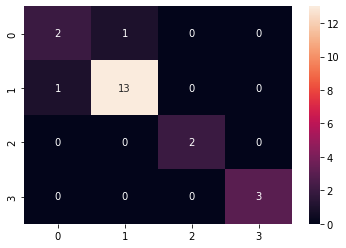

In [16]:
predict_gbm=gbm.predict(X_test)
predict_gbm

#argmax() method
y_pred_1 = [np.argmax(line) for line in predict_gbm]
y_pred_1

accuracy_score(y_test, y_pred_1)

cnf_matrix=confusion_matrix(y_test, y_pred_1)
cnf_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_1, labels=labeles)

f = sns.heatmap(cnf_matrix, annot=True)

print(classification_report(y_test, y_pred_1))

FEATURE IMPORTANT HASIL KLASIFIKASI ORIGINAL LIGHTGBM!!!!!!!!!!!!!!!!!

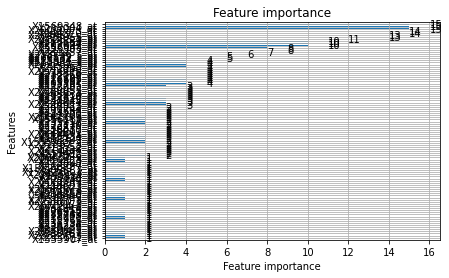

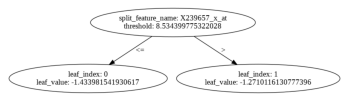

In [17]:
lgb.plot_importance(gbm)
lgb.plot_tree(gbm)

**ROC-AUC ORIGINAL**

In [18]:
clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass',
                         colsample_bytree=1.0, n_estimators=100,
                         num_class=4, metric='multi_logloss', learning_rate = 0.1, max_depth = 1, num_leaves = 4)

In [19]:
clff=OneVsRestClassifier(clf)
y_proba=clff.fit(X_train, y_train).predict_proba(X_test)
y_proba

array([[2.22763452e-05, 9.95339074e-01, 1.39882946e-03, 3.23982059e-03],
       [3.33816591e-01, 9.06096207e-05, 3.33355038e-01, 3.32737761e-01],
       [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
       [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01]])

HASIL PROBS

In [20]:
y_prob = clf.fit(X_train, y_train).predict_proba(X_test)
ybin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = ybin.shape[1]
CLASS_NAMES = [ 'Group 3', 'Group 4', 'SHH', 'WNT']
NUM_CLASSES = len(CLASS_NAMES)


In [21]:
print(y_prob)

[[9.69742001e-01 1.56312458e-02 8.50380052e-03 6.12295224e-03]
 [3.21388916e-05 9.97883941e-01 4.86179851e-04 1.59774018e-03]
 [7.85962425e-01 2.69912856e-02 1.62175147e-01 2.48711427e-02]
 [1.01030492e-04 9.98605180e-01 6.97547888e-04 5.96241623e-04]
 [2.80300681e-02 7.29460832e-02 1.88111293e-01 7.10912556e-01]
 [4.55088371e-02 3.75208567e-03 1.00892665e-02 9.40649811e-01]
 [4.11444415e-03 2.00370103e-03 1.49331077e-03 9.92388544e-01]
 [1.21972665e-04 9.96408968e-01 1.51723959e-03 1.95181979e-03]
 [3.73291532e-02 9.34913143e-01 1.91630956e-02 8.59460779e-03]
 [3.50519287e-01 6.36848403e-01 8.28446853e-03 4.34784142e-03]
 [7.10144071e-02 8.91314352e-01 2.75622385e-02 1.01090022e-02]
 [7.15699697e-04 9.98106422e-01 6.29407885e-04 5.48470695e-04]
 [1.25166444e-03 9.97954813e-01 5.65820054e-04 2.27702839e-04]
 [2.54658865e-05 9.98494986e-01 4.34730775e-04 1.04481716e-03]
 [9.98305106e-01 9.42844704e-04 2.81953757e-04 4.70095731e-04]
 [1.02908150e-03 9.98487145e-01 2.56022174e-04 2.277510

In [22]:
ybin

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

MULTICLASSOVA

In [23]:
clf2 = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclassova',
                         colsample_bytree=1.0, n_estimators=100,
                         num_class=4, metric='multi_logloss', learning_rate = 0.1, max_depth = 1, num_leaves = 4)

In [24]:
y_pred = clf2.fit(X_train, y_train).predict(X_test)
y_pred

array([0, 1, 0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1])

In [25]:
y_proba2 = clf2.fit(X_train, y_train).predict_proba(X_test)
y_proba2

array([[7.23974910e-01, 7.03086425e-04, 6.31507347e-03, 1.11813406e-03],
       [2.23745850e-05, 9.99728571e-01, 1.40499837e-03, 3.25410837e-03],
       [5.38247298e-01, 1.82940427e-04, 5.25031084e-03, 9.99651391e-04],
       [1.08790874e-04, 9.99838614e-01, 8.54905479e-05, 3.14615428e-04],
       [2.83098573e-03, 6.71669667e-04, 8.25675785e-03, 2.91481450e-01],
       [4.80349717e-02, 3.76654751e-04, 7.17560311e-03, 9.19829156e-01],
       [1.90486420e-03, 4.40212687e-05, 4.50619976e-03, 9.18151844e-01],
       [9.83076900e-05, 9.99886181e-01, 8.09738426e-03, 7.02120820e-03],
       [2.92766834e-03, 9.62935433e-01, 1.93881314e-03, 5.26382985e-02],
       [5.68627854e-01, 8.91780854e-01, 5.12015036e-04, 5.04760546e-03],
       [9.30191782e-04, 5.95940249e-01, 9.24423574e-04, 3.00104807e-04],
       [1.16450285e-03, 9.99863474e-01, 1.53017532e-03, 1.08551048e-03],
       [1.05119089e-03, 9.99806529e-01, 1.50576056e-03, 1.75058720e-03],
       [1.37482444e-05, 9.99886181e-01, 1.28423323e

In [26]:
y_prob = clf2.fit(X_train, y_train).predict_proba(X_test)
ybin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = ybin.shape[1]
CLASS_NAMES = [ 'Group 3', 'Group 4', 'SHH', 'WNT']
NUM_CLASSES = len(CLASS_NAMES)

In [27]:
y_prob.shape,ybin.shape

((22, 4), (22, 4))

In [28]:
y_prob

array([[7.23974910e-01, 7.03086425e-04, 6.31507347e-03, 1.11813406e-03],
       [2.23745850e-05, 9.99728571e-01, 1.40499837e-03, 3.25410837e-03],
       [5.38247298e-01, 1.82940427e-04, 5.25031084e-03, 9.99651391e-04],
       [1.08790874e-04, 9.99838614e-01, 8.54905479e-05, 3.14615428e-04],
       [2.83098573e-03, 6.71669667e-04, 8.25675785e-03, 2.91481450e-01],
       [4.80349717e-02, 3.76654751e-04, 7.17560311e-03, 9.19829156e-01],
       [1.90486420e-03, 4.40212687e-05, 4.50619976e-03, 9.18151844e-01],
       [9.83076900e-05, 9.99886181e-01, 8.09738426e-03, 7.02120820e-03],
       [2.92766834e-03, 9.62935433e-01, 1.93881314e-03, 5.26382985e-02],
       [5.68627854e-01, 8.91780854e-01, 5.12015036e-04, 5.04760546e-03],
       [9.30191782e-04, 5.95940249e-01, 9.24423574e-04, 3.00104807e-04],
       [1.16450285e-03, 9.99863474e-01, 1.53017532e-03, 1.08551048e-03],
       [1.05119089e-03, 9.99806529e-01, 1.50576056e-03, 1.75058720e-03],
       [1.37482444e-05, 9.99886181e-01, 1.28423323e

In [29]:
ybin

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

**ROC-AUC FOR EACH CLASS (THRESHOLDS)**

In [30]:
def compute_AUCs(ybin, y_prob):
	AUROCs = []
	y_np = ybin
	pred_np = y_prob
	for i in range(len(y_np[0])):
		AUROCs.append(roc_auc_score(y_np[:, i], pred_np[:, i]))
	return AUROCs

def compute_ROCs(ybin, y_prob):
	y_np = ybin
	pred_np = y_prob

	results = {
		'fpr' : [],
		'tpr' : [],
		'thresholds': [],
		'gmeans': [],
		'idmax': [],
		'optimal_threshold': []
	}

	for i in range(len(y_np[0])):
		fpr, tpr, thresholds = roc_curve(y_np[:, i], pred_np[:, i])
		gmeans = np.sqrt(tpr * (1-fpr))
		ix = np.argmax(gmeans)
		results['fpr'].append(fpr.tolist())
		results['tpr'].append(tpr.tolist())
		results['thresholds'].append(thresholds.tolist())
		results['gmeans'].append(gmeans.tolist())
		results['idmax'].append(int(ix))
		results['optimal_threshold'].append(float(thresholds[ix]))

	return results

def get_threshold(ybin, y_prob):
	y_np = ybin
	pred_np = y_prob

	results = []
	for i in range(len(y_np[0])):
		fpr, tpr, thresholds = roc_curve(y_np[:, i], pred_np[:, i])
		gmeans = np.sqrt(tpr * (1-fpr))
		ix = np.argmax(gmeans)
		results.append(thresholds[ix])

	return results

def create_roc_curve(ybin, y_prob):
	y_np = ybin
	pred_np = y_prob

	colors = [
	'#0033cc', '#ff0000', '#ff9933', '#993399']

	linestyles = [
	'solid', 'dotted', 'dashed', 'dashdot']

	for i in range(len(y_np[0])):
		fpr, tpr, thresholds = roc_curve(y_np[:, i], pred_np[:, i])
		gmeans = np.sqrt(tpr * (1-fpr))
		ix = np.argmax(gmeans)
		plt.plot([0,1], [0,1], linestyle='--')
		plt.plot(fpr, tpr, linestyle=linestyles[i], color=colors[i], label='{} t={:.5f}'.format(CLASS_NAMES[i], thresholds[ix]))
		plt.scatter(fpr[ix], tpr[ix], marker='o', color=colors[i])

	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.legend()
	plt.show()


In [31]:
y_np = ybin
pred_np = y_prob
print(y_np)
print(pred_np)

[[1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]]
[[7.23974910e-01 7.03086425e-04 6.31507347e-03 1.11813406e-03]
 [2.23745850e-05 9.99728571e-01 1.40499837e-03 3.25410837e-03]
 [5.38247298e-01 1.82940427e-04 5.25031084e-03 9.99651391e-04]
 [1.08790874e-04 9.99838614e-01 8.54905479e-05 3.14615428e-04]
 [2.83098573e-03 6.71669667e-04 8.25675785e-03 2.91481450e-01]
 [4.80349717e-02 3.76654751e-04 7.17560311e-03 9.19829156e-01]
 [1.90486420e-03 4.40212687e-05 4.50619976e-03 9.18151844e-01]
 [9.83076900e-05 9.99886181e-01 8.09738426e-03 7.02120820e-03]
 [2.92766834e-03 9.62935433e-01 1.93881314e-03 5.26382985e-02]
 [5.68627854e-01 8.91780854e-01 5.12015036e-04 5.04760546e-03]
 [9.30191782e-04 5.95940249e-01 9.24423574e-04 3.00104807e-04]
 [1.16450285e-03 9.99863474e-01 1.53017532e-03 1.08551048e-03]
 

AUROCS GLOBAL

In [32]:
	AUROCs_global = compute_AUCs(ybin, y_prob)
	AUROCs_global_avg = np.array(AUROCs_global[:4]).mean()

	ROCs_global = compute_ROCs(ybin, y_prob)

	AUROCs_local = [0. for a in range(NUM_CLASSES)]
	AUROCs_local_avg = 0.
	AUROCs_fusion = [0. for a in range(NUM_CLASSES)]
	AUROCs_fusion_avg = 0.


In [33]:
print(AUROCs_global)
print(AUROCs_global_avg)
print(ROCs_global)


[1.0, 0.9285714285714285, 1.0, 1.0]
0.9821428571428571
{'fpr': [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0.875, 0.875, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0]], 'tpr': [[0.0, 0.3333333333333333, 1.0, 1.0], [0.0, 0.21428571428571427, 0.2857142857142857, 0.5714285714285714, 0.8571428571428571, 0.8571428571428571, 0.9285714285714286, 0.9285714285714286, 1.0, 1.0], [0.0, 0.5, 1.0, 1.0], [0.0, 0.3333333333333333, 1.0, 1.0]], 'thresholds': [[1.99726889737261, 0.99726889737261, 0.5686278535596356, 1.3748244445203224e-05], [1.9998861814974291, 0.9998861814974291, 0.9998634741804568, 0.9998065285941924, 0.9629354329568465, 0.8917808544603743, 0.5959402490745536, 0.00037665475062397674, 0.00018294042689877607, 4.402126871521996e-05], [1.9836684716084205, 0.9836684716084205, 0.7799881889617112, 8.549054787625357e-05], [1.9198291558356435, 0.9198291558356434, 0.29148145040137385, 0.000300104807325217]], 'gmeans': [[0.0, 0.5773502691896257, 1.0, 0.0], [0.0, 0.462910049

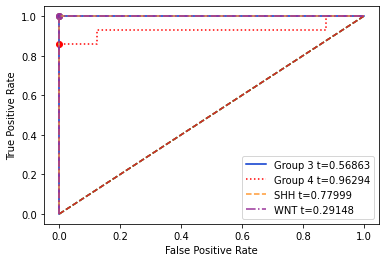

None


In [34]:
print(create_roc_curve(ybin,y_prob))

**PRECISION-RECALL CURVE**

In [35]:
def create_precision_recall_curve(ybin, y_prob):
	y_np = ybin
	pred_np = y_prob

	colors = [
	'#0033cc', '#ff0000', '#ff9933', '#993399']

	linestyles = [
	'solid', 'dotted', 'dashed', 'dashdot']

	for i in range(len(y_np[0])):
		precision, recall, thresholds = precision_recall_curve(y_np[:, i], pred_np[:, i])
		fscore = (2 * precision * recall) / (precision + recall)
		ix = np.argmax(fscore)
		plt.plot([0,1], [0,1], linestyle='--')
		plt.plot(recall, precision, linestyle=linestyles[i], color=colors[i], label='{} t={:.5f} F={:.3f}'.format(CLASS_NAMES[i], thresholds[ix], fscore[ix]))
		plt.scatter(recall[ix], precision[ix], marker='o', color=colors[i])

	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.legend()
	plt.show()

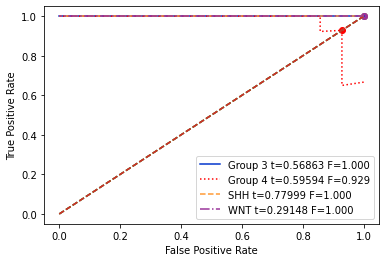

None


In [36]:
print(create_precision_recall_curve(ybin,y_prob))

**MODEL RESAMPLING DENGAN SMOTENC**

RESAMPLING DATA DENGAN SMOTENC

In [37]:
ovr = SMOTENC(random_state=0, categorical_features=[6271,6272,6273], k_neighbors=2)
x_smotenc, y_smotenc = ovr.fit_resample(X_train, y_train.ravel())
x_smotenc.shape, y_smotenc.shape

((100, 6274), (100,))

MELIHAT JUMLAH MASING-MASING KELAS SETELAH DIRESAMPLING

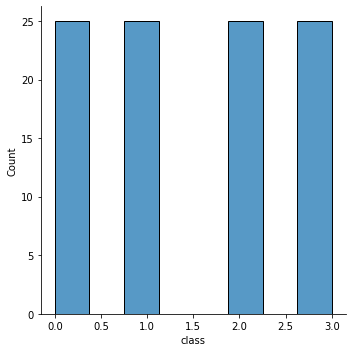

In [38]:
y_train_smotenc = pd.DataFrame(data=y_smotenc, columns=['class'])
sns.displot(y_train_smotenc, x="class")

MEMBANGUN MODEL SETELAH DIRESAMPLING

In [40]:
param_dict_smotenc = {
    'num_leaves': [4, 8, 12, 20],
    'max_depth': [1,2,3,4,5,6,7,8],
    'learning_rate':[0.1,0.3,0.5,0.7,0.9]
    }


clf_smotenc = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass',
                         colsample_bytree=1.0, n_estimators=100,
                         num_class=4, metric='multi_logloss')

gs_smotenc=GridSearchCV(clf_smotenc, param_dict_smotenc, scoring='accuracy', verbose=1,cv=5, n_jobs=1)
gs_smotenc.fit(x_smotenc,y_smotenc)
gs_smotenc.best_params_
gs_smotenc.best_score_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


0.93

HASIL DENGAN RESAMPLING

In [41]:
predict_grid_smotenc = gs_smotenc.predict(X_test)
print("nilai f-1 score AFTER SMOTENC     : %0.3f"% metrics.f1_score(y_test, predict_grid_smotenc, average='macro'))
print("nilai akurasi AFTER SMOTENC        : %0.3f"% metrics.accuracy_score(y_test, predict_grid_smotenc))

print('Combination SMOTENC Results:',classification_report_imbalanced(y_test, predict_grid_smotenc))
print(confusion_matrix(y_test, predict_grid_smotenc))
print('Akurasi Combination SMOTENC = ', accuracy_score(y_test, predict_grid_smotenc))

nilai f-1 score AFTER SMOTENC     : 0.815
nilai akurasi AFTER SMOTENC        : 0.864
Combination SMOTENC Results:                    pre       rec       spe        f1       geo       iba       sup

          0       0.67      0.67      0.95      0.67      0.79      0.61         3
          1       0.93      0.93      0.88      0.93      0.90      0.82        14
          2       1.00      1.00      1.00      1.00      1.00      1.00         2
          3       0.67      0.67      0.95      0.67      0.79      0.61         3

avg / total       0.86      0.86      0.91      0.86      0.88      0.78        22

[[ 2  0  0  1]
 [ 1 13  0  0]
 [ 0  0  2  0]
 [ 0  1  0  2]]
Akurasi Combination SMOTENC =  0.8636363636363636


CONFUSSION MATRIX SETELAH DIRESAMPLING

['Class 0', 'Class 1', 'Class 2', 'Class 3']


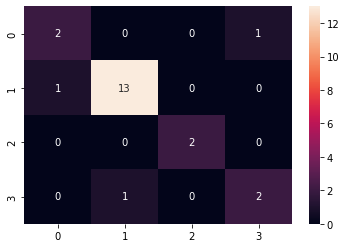

In [42]:
classes =[]
labeles=np.unique(y_train)
for v in labeles:
    classes.append('Class '+ str(v))
print(classes)
classes

cnf_matrix_smotenc = confusion_matrix(y_test, predict_grid_smotenc, labels=labeles)
cnf_matrix_smotenc

f = sns.heatmap(cnf_matrix_smotenc, annot=True)

****LGB TRAIN SETELAH RESAMPLING**********************************

DATASET LGB&CATEGORICAL FEATURE

In [43]:
lgb_train_smotenc = lgb.Dataset(x_smotenc, label= y_smotenc)
lgb_test_smotenc = lgb.Dataset(X_test, y_test)
cate_features = [6271,6272,6273]

TRAINING MODEL

In [44]:
param_smotenc = {
'boosting_type': 'gbdt',
'objective': 'multiclass',
'metric': 'multi_logloss',
'num_class':4,
'max_depth':1,
'num_leaves':4,
'learning_rate':0.1
}

gbm_smotenc = lgb.train(
param_smotenc,
lgb_train_smotenc,
categorical_feature = cate_features,
num_boost_round=100,
valid_sets=[lgb_train_smotenc, lgb_test_smotenc],
early_stopping_rounds=10
)

gbm_smotenc.best_iteration
gbm_smotenc.best_score

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [6271, 6272, 6273]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	training's multi_logloss: 1.20053	valid_1's multi_logloss: 1.23801
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 1.05095	valid_1's multi_logloss: 1.11926
[3]	training's multi_logloss: 0.927037	valid_1's multi_logloss: 1.02407
[4]	training's multi_logloss: 0.822183	valid_1's multi_logloss: 0.942095
[5]	training's multi_logloss: 0.732337	valid_1's multi_logloss: 0.871035
[6]	training's multi_logloss: 0.654431	valid_1's multi_logloss: 0.807977
[7]	training's multi_logloss: 0.586447	valid_1's multi_logloss: 0.756884
[8]	training's multi_logloss: 0.52661	valid_1's multi_logloss: 0.710323
[9]	training's multi_logloss: 0.473744	valid_1's multi_logloss: 0.668443
[10]	training's multi_logloss: 0.426821	valid_1's multi_logloss: 0.634208
[11]	training's multi_logloss: 0.38501	valid_1's multi_logloss: 0.600202
[12]	training's multi_logloss: 0.347824	valid_1's multi_logloss: 0.572515
[13]	training's multi_logloss: 0.31452	valid_1's multi_logloss: 0.

defaultdict(dict,
            {'training': {'multi_logloss': 0.03293984815889126},
             'valid_1': {'multi_logloss': 0.3496155692803566}})

HASIL PREDIKSI SETELAH RESAMPLING

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22



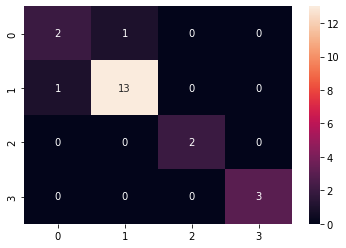

In [45]:
predict_gbm_smotenc=gbm_smotenc.predict(X_test)
predict_gbm_smotenc

#argmax() method
y_pred_smotenc = [np.argmax(line) for line in predict_gbm]
y_pred_smotenc

accuracy_score(y_test, y_pred_smotenc)

cnf_matrix_smotenc=confusion_matrix(y_test, y_pred_smotenc)
cnf_matrix_smotenc

cnf_matrix_smotenc = confusion_matrix(y_test, y_pred_smotenc, labels=labeles)

f = sns.heatmap(cnf_matrix_smotenc, annot=True)

print(classification_report(y_test, y_pred_smotenc))

FEATURE IMPORTANT HASIL KLASIFIKASI - RESAMPLING

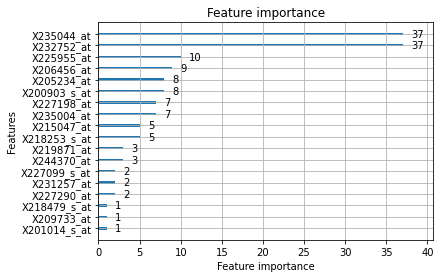

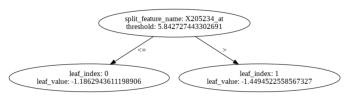

In [46]:
lgb.plot_importance(gbm_smotenc)
lgb.plot_tree(gbm_smotenc)


**ROC-AUC - AFTER RESAMPLING**

In [47]:
clf_smotenc = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass',
                         colsample_bytree=1.0, n_estimators=100,
                         num_class=4, metric='multi_logloss', learning_rate = 0.1, max_depth = 1, num_leaves = 4)

HASIL PROBS

In [48]:
y_prob_smotenc = clf_smotenc.fit(x_smotenc, y_smotenc).predict_proba(X_test)
ybin_smotenc = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = ybin_smotenc.shape[1]


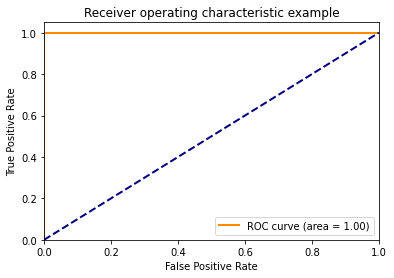

In [49]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybin_smotenc[:, i], y_prob_smotenc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybin_smotenc.ravel(), y_prob_smotenc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


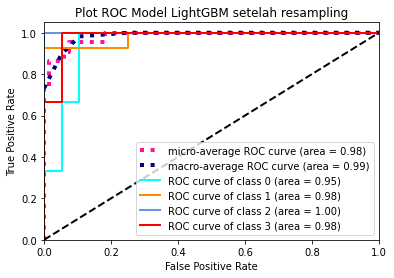

In [50]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Plot ROC Model LightGBM setelah resampling')
plt.legend(loc="lower right")
plt.show()

 **BANDINGKAN HASIL ORIGINAL DENGAN RESAMPLING**

In [51]:
#ORIGINAL
predict_grid = gs.predict(X_test)
print("nilai f-1 score     : %0.3f"% metrics.f1_score(y_test, predict_grid, average='macro'))
print("nilai akurasi        : %0.3f"% metrics.accuracy_score(y_test, predict_grid))

print('Original Results:',classification_report(y_test, predict_grid))
print(confusion_matrix(y_test, predict_grid))
print('Akurasi Original Result = ', accuracy_score(y_test, predict_grid))

nilai f-1 score     : 0.899
nilai akurasi        : 0.909
Original Results:               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22

[[ 2  1  0  0]
 [ 1 13  0  0]
 [ 0  0  2  0]
 [ 0  0  0  3]]
Akurasi Original Result =  0.9090909090909091


In [52]:
#SMOTENC
predict_grid_smotenc = gs_smotenc.predict(X_test)
print("nilai f-1 score AFTER SMOTENC     : %0.3f"% metrics.f1_score(y_test, predict_grid_smotenc, average='macro'))
print("nilai akurasi AFTER SMOTENC        : %0.3f"% metrics.accuracy_score(y_test, predict_grid_smotenc))

print('Combination SMOTENC Results:',classification_report_imbalanced(y_test, predict_grid_smotenc))
print(confusion_matrix(y_test, predict_grid_smotenc))
print('Akurasi Combination SMOTENC = ', accuracy_score(y_test, predict_grid_smotenc))

nilai f-1 score AFTER SMOTENC     : 0.815
nilai akurasi AFTER SMOTENC        : 0.864
Combination SMOTENC Results:                    pre       rec       spe        f1       geo       iba       sup

          0       0.67      0.67      0.95      0.67      0.79      0.61         3
          1       0.93      0.93      0.88      0.93      0.90      0.82        14
          2       1.00      1.00      1.00      1.00      1.00      1.00         2
          3       0.67      0.67      0.95      0.67      0.79      0.61         3

avg / total       0.86      0.86      0.91      0.86      0.88      0.78        22

[[ 2  0  0  1]
 [ 1 13  0  0]
 [ 0  0  2  0]
 [ 0  1  0  2]]
Akurasi Combination SMOTENC =  0.8636363636363636


MULTICLASSOVA - RESAMPLING 

In [53]:
clf_smotenc2 = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclassova',
                         colsample_bytree=1.0, n_estimators=100,
                         num_class=4, metric='multi_logloss', learning_rate = 0.1, max_depth = 1, num_leaves = 4)

In [54]:
y_pred_smotenc2 = clf_smotenc2.fit(x_smotenc, y_smotenc).predict(X_test)
y_pred_smotenc2

array([3, 1, 0, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1])

In [55]:
y_proba_smotenc2 = clf_smotenc2.fit(x_smotenc, y_smotenc).predict_proba(X_test)
y_proba_smotenc2

array([[9.99542876e-01, 1.47506030e-03, 1.36605472e-05, 9.99961368e-01],
       [3.60872902e-05, 9.97543596e-01, 1.36605472e-05, 1.36605472e-05],
       [9.10220798e-01, 1.83781038e-04, 1.36605472e-05, 1.36605472e-05],
       [5.04598741e-05, 9.99850617e-01, 1.36605472e-05, 1.36605472e-05],
       [2.19679776e-04, 1.31994425e-03, 1.36605472e-05, 1.36605472e-05],
       [3.68881536e-04, 1.81836478e-04, 1.36605472e-05, 9.99961368e-01],
       [1.63263172e-04, 3.85595093e-05, 1.36605472e-05, 9.99961368e-01],
       [3.60872902e-05, 9.99850617e-01, 1.36605472e-05, 1.36605472e-05],
       [1.27508583e-04, 9.14581685e-01, 1.36605472e-05, 1.36605472e-05],
       [9.90294851e-01, 3.41079776e-01, 1.36605472e-05, 1.36605472e-05],
       [1.38623768e-02, 6.67272570e-01, 1.36605472e-05, 1.36605472e-05],
       [5.04598741e-05, 9.99785098e-01, 1.36605472e-05, 1.36605472e-05],
       [3.60872902e-05, 9.99850617e-01, 1.36605472e-05, 1.36605472e-05],
       [5.04598741e-05, 9.99850617e-01, 1.36605472e

In [56]:
y_prob_smotenc2 = clf_smotenc2.fit(x_smotenc, y_smotenc).predict_proba(X_test)
ybin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = ybin.shape[1]
CLASS_NAMES = [ 'Group 3', 'Group 4', 'SHH', 'WNT']
NUM_CLASSES = len(CLASS_NAMES)

In [57]:
y_prob_smotenc2.shape,ybin.shape

((22, 4), (22, 4))

**ROC-AUC FOR EACH CLASS (THRESHOLDS)**

In [58]:
def compute_AUCs(ybin, y_prob_smotenc2):
	AUROCs = []
	y_np = ybin
	pred_np = y_prob_smotenc2
	for i in range(len(y_np[0])):
		AUROCs.append(roc_auc_score(y_np[:, i], pred_np[:, i]))
	return AUROCs

def compute_ROCs(ybin, y_prob_smotenc2):
	y_np = ybin
	pred_np = y_prob_smotenc2

	results = {
		'fpr' : [],
		'tpr' : [],
		'thresholds': [],
		'gmeans': [],
		'idmax': [],
		'optimal_threshold': []
	}

	for i in range(len(y_np[0])):
		fpr, tpr, thresholds = roc_curve(y_np[:, i], pred_np[:, i])
		gmeans = np.sqrt(tpr * (1-fpr))
		ix = np.argmax(gmeans)
		results['fpr'].append(fpr.tolist())
		results['tpr'].append(tpr.tolist())
		results['thresholds'].append(thresholds.tolist())
		results['gmeans'].append(gmeans.tolist())
		results['idmax'].append(int(ix))
		results['optimal_threshold'].append(float(thresholds[ix]))

	return results

def get_threshold(ybin, y_prob_smotenc2):
	y_np = ybin
	pred_np = y_prob_smotenc2

	results = []
	for i in range(len(y_np[0])):
		fpr, tpr, thresholds = roc_curve(y_np[:, i], pred_np[:, i])
		gmeans = np.sqrt(tpr * (1-fpr))
		ix = np.argmax(gmeans)
		results.append(thresholds[ix])

	return results

def create_roc_curve(ybin, y_prob_smotenc2):
	y_np = ybin
	pred_np = y_prob_smotenc2

	colors = [
	'#0033cc', '#ff0000', '#ff9933', '#993399']

	linestyles = [
	'solid', 'dotted', 'dashed', 'dashdot']

	for i in range(len(y_np[0])):
		fpr, tpr, thresholds = roc_curve(y_np[:, i], pred_np[:, i])
		gmeans = np.sqrt(tpr * (1-fpr))
		ix = np.argmax(gmeans)
		plt.plot([0,1], [0,1], linestyle='--')
		plt.plot(fpr, tpr, linestyle=linestyles[i], color=colors[i], label='{} t={:.5f}'.format(CLASS_NAMES[i], thresholds[ix]))
		plt.scatter(fpr[ix], tpr[ix], marker='o', color=colors[i])

	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.legend()
	plt.show()


In [59]:
y_np = ybin
pred_np = y_prob_smotenc2
print(y_np)
print(pred_np)

[[1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]]
[[9.99542876e-01 1.47506030e-03 1.36605472e-05 9.99961368e-01]
 [3.60872902e-05 9.97543596e-01 1.36605472e-05 1.36605472e-05]
 [9.10220798e-01 1.83781038e-04 1.36605472e-05 1.36605472e-05]
 [5.04598741e-05 9.99850617e-01 1.36605472e-05 1.36605472e-05]
 [2.19679776e-04 1.31994425e-03 1.36605472e-05 1.36605472e-05]
 [3.68881536e-04 1.81836478e-04 1.36605472e-05 9.99961368e-01]
 [1.63263172e-04 3.85595093e-05 1.36605472e-05 9.99961368e-01]
 [3.60872902e-05 9.99850617e-01 1.36605472e-05 1.36605472e-05]
 [1.27508583e-04 9.14581685e-01 1.36605472e-05 1.36605472e-05]
 [9.90294851e-01 3.41079776e-01 1.36605472e-05 1.36605472e-05]
 [1.38623768e-02 6.67272570e-01 1.36605472e-05 1.36605472e-05]
 [5.04598741e-05 9.99785098e-01 1.36605472e-05 1.36605472e-05]
 

AUROCS GLOBAL

In [60]:
	AUROCs_global = compute_AUCs(ybin, y_prob_smotenc2)
	AUROCs_global_avg = np.array(AUROCs_global[:4]).mean()

	ROCs_global = compute_ROCs(ybin, y_prob_smotenc2)

	AUROCs_local = [0. for a in range(NUM_CLASSES)]
	AUROCs_local_avg = 0.
	AUROCs_fusion = [0. for a in range(NUM_CLASSES)]
	AUROCs_fusion_avg = 0.


In [61]:
print(AUROCs_global)
print(AUROCs_global_avg)
print(ROCs_global)


[1.0, 0.9553571428571429, 1.0, 0.8070175438596492]
0.940593671679198
{'fpr': [[0.0, 0.0, 0.0, 0.631578947368421, 0.8421052631578947, 1.0], [0.0, 0.0, 0.0, 0.625, 0.625, 1.0], [0.0, 0.0, 1.0], [0.0, 0.05263157894736842, 1.0]], 'tpr': [[0.0, 0.3333333333333333, 1.0, 1.0, 1.0, 1.0], [0.0, 0.42857142857142855, 0.9285714285714286, 0.9285714285714286, 1.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.6666666666666666, 1.0]], 'thresholds': [[1.9995428756143245, 0.9995428756143245, 0.9902948514883126, 0.00010264240975214859, 5.045987411998112e-05, 3.608729022366471e-05], [1.9998506173799235, 0.9998506173799236, 0.6672725702732374, 0.0003073102361651723, 0.00018378103769527035, 3.8559509318335236e-05], [1.9999613681000885, 0.9999613681000886, 1.3660547230668057e-05], [1.9999613681000885, 0.9999613681000886, 1.3660547230668057e-05]], 'gmeans': [[0.0, 0.5773502691896257, 1.0, 0.606976978666884, 0.3973597071195132, 0.0], [0.0, 0.6546536707079771, 0.9636241116594315, 0.5900968443520823, 0.6123724356957945, 0.0],

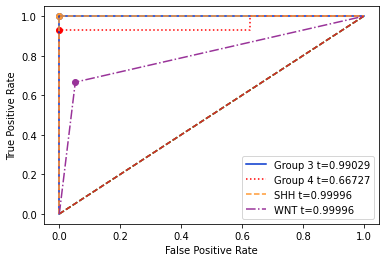

None


In [62]:
print(create_roc_curve(ybin,y_prob_smotenc2))

**PRECISION-RECALL CURVE**

In [63]:
def create_precision_recall_curve(ybin, y_prob_smotenc2):
	y_np = ybin
	pred_np = y_prob_smotenc2

	colors = [
	'#0033cc', '#ff0000', '#ff9933', '#993399']

	linestyles = [
	'solid', 'dotted', 'dashed', 'dashdot']

	for i in range(len(y_np[0])):
		precision, recall, thresholds = precision_recall_curve(y_np[:, i], pred_np[:, i])
		fscore = (2 * precision * recall) / (precision + recall)
		ix = np.argmax(fscore)
		plt.plot([0,1], [0,1], linestyle='--')
		plt.plot(recall, precision, linestyle=linestyles[i], color=colors[i], label='{} t={:.5f} F={:.3f}'.format(CLASS_NAMES[i], thresholds[ix], fscore[ix]))
		plt.scatter(recall[ix], precision[ix], marker='o', color=colors[i])

	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.legend()
	plt.show()

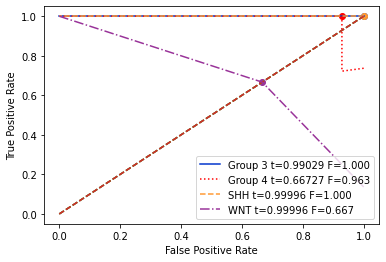

None


In [64]:
print(create_precision_recall_curve(ybin,y_prob_smotenc2))